In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

## Load the Data

In [3]:
# Load the datasets
gdsc_dataset = pd.read_csv('C:/Users/Admin/Genomic Data analysis/GDSC_DATASET.csv')
compounds_annotation = pd.read_csv('C:/Users/Admin/Genomic Data analysis/Compounds-annotation.csv')
gdsc2_dataset = pd.read_csv('C:/Users/Admin/Genomic Data analysis/GDSC2-dataset.csv')
cell_lines_details = pd.read_excel('C:/Users/Admin/Genomic Data analysis/Cell_Lines_Details.xlsx')

## Explore the Data

In [4]:
# Display the first few rows of each dataset
display(gdsc_dataset.head())
display(compounds_annotation.head())
display(gdsc2_dataset.head())
display(cell_lines_details.head())

COSMIC_ID CELL_LINE_NAME     TCGA_DESC  DRUG_ID     DRUG_NAME   LN_IC50  \
0     683667         PFSK-1            MB     1003  Camptothecin -1.463887   
1     684057            ES5  UNCLASSIFIED     1003  Camptothecin -3.360586   
2     684059            ES7  UNCLASSIFIED     1003  Camptothecin -5.044940   
3     684062          EW-11  UNCLASSIFIED     1003  Camptothecin -3.741991   
4     684072        SK-ES-1  UNCLASSIFIED     1003  Camptothecin -5.142961   

        AUC   Z_SCORE GDSC Tissue descriptor 1 GDSC Tissue descriptor 2  \
0  0.930220  0.433123           nervous_system          medulloblastoma   
1  0.791072 -0.599569                     bone           ewings_sarcoma   
2  0.592660 -1.516647                     bone           ewings_sarcoma   
3  0.734047 -0.807232                     bone           ewings_sarcoma   
4  0.582439 -1.570016                     bone           ewings_sarcoma   

  Cancer Type (matching TCGA label) Microsatellite instability Status (MSI)  \
0                                MB                               MSS/MSI-L   
1                               NaN                               MSS/MSI-L   
2                               NaN                               MSS/MSI-L   
3                               NaN                               MSS/MSI-L   
4                               NaN                               MSS/MSI-L   

  Screen Medium Growth Properties CNA Gene Expression Methylation TARGET  \
0             R          Adherent   Y               Y           Y   TOP1   
1             R          Adherent   Y               Y           Y   TOP1   
2             R          Adherent   Y               Y           Y   TOP1   
3             R          Adherent   Y               Y           Y   TOP1   
4             R     Semi-Adherent   Y               Y           Y   TOP1   

    TARGET_PATHWAY  
0  DNA replication  
1  DNA replication  
2  DNA replication  
3  DNA replication  
4  DNA replication

DRUG_ID SCREENING_SITE   DRUG_NAME  \
0        1            MGH   Erlotinib   
1        3            MGH   Rapamycin   
2        5            MGH   Sunitinib   
3        6            MGH  PHA-665752   
4        9            MGH      MG-132   

                                            SYNONYMS  \
0  Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...   
1  AY-22989, Sirolimus, WY-090217, Torisel, Rapamune   
2                 Sutent, Sunitinib Malate, SU-11248   
3                              PHA665752, PHA 665752   
4                             LLL cpd, MG 132, MG132   

                                TARGET                     TARGET_PATHWAY  
0                                 EGFR                     EGFR signaling  
1                               MTORC1                PI3K/MTOR signaling  
2  PDGFR, KIT, VEGFR, FLT3, RET, CSF1R                      RTK signaling  
3                                  MET                      RTK signaling  
4                    Proteasome, CAPN1  Protein stability and degradation

DATASET  NLME_RESULT_ID  NLME_CURVE_ID  COSMIC_ID CELL_LINE_NAME  \
0   GDSC2             343       15946310     683667         PFSK-1   
1   GDSC2             343       15946548     684052           A673   
2   GDSC2             343       15946830     684057            ES5   
3   GDSC2             343       15947087     684059            ES7   
4   GDSC2             343       15947369     684062          EW-11   

  SANGER_MODEL_ID     TCGA_DESC  DRUG_ID     DRUG_NAME PUTATIVE_TARGET  \
0       SIDM01132            MB     1003  Camptothecin            TOP1   
1       SIDM00848  UNCLASSIFIED     1003  Camptothecin            TOP1   
2       SIDM00263  UNCLASSIFIED     1003  Camptothecin            TOP1   
3       SIDM00269  UNCLASSIFIED     1003  Camptothecin            TOP1   
4       SIDM00203  UNCLASSIFIED     1003  Camptothecin            TOP1   

      PATHWAY_NAME  COMPANY_ID WEBRELEASE  MIN_CONC  MAX_CONC   LN_IC50  \
0  DNA replication        1046          Y    0.0001       0.1 -1.463887   
1  DNA replication        1046          Y    0.0001       0.1 -4.869455   
2  DNA replication        1046          Y    0.0001       0.1 -3.360586   
3  DNA replication        1046          Y    0.0001       0.1 -5.044940   
4  DNA replication        1046          Y    0.0001       0.1 -3.741991   

        AUC      RMSE   Z_SCORE  
0  0.930220  0.089052  0.433123  
1  0.614970  0.111351 -1.421100  
2  0.791072  0.142855 -0.599569  
3  0.592660  0.135539 -1.516647  
4  0.734047  0.128059 -0.807232

Sample Name  COSMIC identifier Whole Exome Sequencing (WES)  \
0        A253           906794.0                            Y   
1    BB30-HNC           753531.0                            Y   
2    BB49-HNC           753532.0                            Y   
3         BHY           753535.0                            Y   
4      BICR10          1290724.0                            Y   

  Copy Number Alterations (CNA) Gene Expression Methylation Drug\nResponse  \
0                             Y               Y           Y              Y   
1                             Y               Y           Y              Y   
2                             Y               Y           Y              Y   
3                             Y               Y           Y              Y   
4                             Y               Y           Y              Y   

  GDSC\nTissue descriptor 1 GDSC\nTissue\ndescriptor 2  \
0            aero_dig_tract              head and neck   
1            aero_dig_tract              head and neck   
2            aero_dig_tract              head and neck   
3            aero_dig_tract              head and neck   
4            aero_dig_tract              head and neck   

  Cancer Type\n(matching TCGA label)  \
0                                NaN   
1                               HNSC   
2                               HNSC   
3                               HNSC   
4                               HNSC   

  Microsatellite \ninstability Status (MSI) Screen Medium Growth Properties  
0                                 MSS/MSI-L         D/F12          Adherent  
1                                 MSS/MSI-L         D/F12          Adherent  
2                                 MSS/MSI-L         D/F12          Adherent  
3                                 MSS/MSI-L         D/F12          Adherent  
4                                 MSS/MSI-L         D/F12          Adherent

## Data Cleaning and Preparation

In [5]:
# Check for missing values
print(gdsc_dataset.isnull().sum())
print(compounds_annotation.isnull().sum())
print(gdsc2_dataset.isnull().sum())
print(cell_lines_details.isnull().sum())

COSMIC_ID                                      0
CELL_LINE_NAME                                 0
TCGA_DESC                                   1067
DRUG_ID                                        0
DRUG_NAME                                      0
LN_IC50                                        0
AUC                                            0
Z_SCORE                                        0
GDSC Tissue descriptor 1                    9366
GDSC Tissue descriptor 2                    9366
Cancer Type (matching TCGA label)          51446
Microsatellite instability Status (MSI)    12353
Screen Medium                               9366
Growth Properties                           9366
CNA                                         9366
Gene Expression                             9366
Methylation                                 9366
TARGET                                     27155
TARGET_PATHWAY                                 0
dtype: int64
DRUG_ID             0
SCREENING_SITE      0
DRUG_NAME   

In [6]:
# Drop rows with missing values for simplicity
gdsc_dataset = gdsc_dataset.dropna()
compounds_annotation = compounds_annotation.dropna()
gdsc2_dataset = gdsc2_dataset.dropna()
cell_lines_details = cell_lines_details.dropna()

## Correlation Analysis

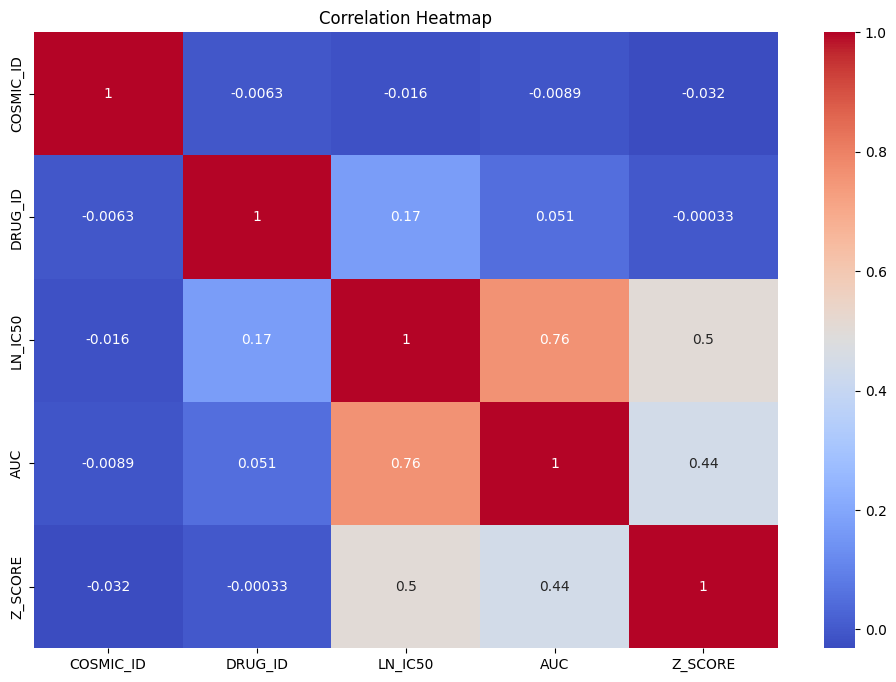

In [7]:
# Select only numeric columns for correlation analysis
numeric_df = gdsc_dataset.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Merging datasets

In [8]:
# Merge GDSC2 dataset with Cell Lines Details on COSMIC_ID
merged_df = pd.merge(gdsc2_dataset, cell_lines_details, left_on='COSMIC_ID', right_on='COSMIC identifier', how='left')

# Merge the resulting dataframe with Compounds Annotation on DRUG_ID
final_df = pd.merge(merged_df, compounds_annotation, on='DRUG_ID', how='left')

## Predictive Modeling Using Random Forest Regressor 

In [9]:
# Define features and target variable
X = final_df[['DRUG_ID', 'AUC', 'Z_SCORE', 
                 'Whole Exome Sequencing (WES)',
    'Copy Number Alterations (CNA)',
    'Gene Expression',
    'Methylation',
    'DRUG_ID',
    'GDSC\nTissue descriptor 1',
    'GDSC\nTissue\ndescriptor 2',
    'Cancer Type\n(matching TCGA label)', 
    'Microsatellite \ninstability Status (MSI)',
    'Growth Properties']]
y = final_df['LN_IC50']

#Hot one encoding variable that need to be hot-one encoded
X = pd.get_dummies(X, columns=[
    'Whole Exome Sequencing (WES)',
    'Copy Number Alterations (CNA)',
    'Gene Expression',
    'Methylation',
    'DRUG_ID',
    'GDSC\nTissue descriptor 1',
    'GDSC\nTissue\ndescriptor 2',
    'Cancer Type\n(matching TCGA label)', 
    'Microsatellite \ninstability Status (MSI)',
    'Growth Properties', 
])

X = X.astype(float)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_RandomForest = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_RandomForest)
r2 = r2_score(y_test, y_pred_RandomForest)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.08294038532604173
R-squared: 0.9897217925686635


# Predictive Modeling Using Deep Learning Model

In [10]:
# Define the neural network architecture 
class DrugSensitivityModel(nn.Module):
    def __init__(self, input_dim):
        super(DrugSensitivityModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
# Determine the input dimension
input_dim = X_train.shape[1]


# Initialize the model
model = DrugSensitivityModel(input_dim)

            
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values).float()
y_train_tensor = torch.tensor(y_train.values).float()
X_test_tensor = torch.tensor(X_test.values).float()
y_test_tensor = torch.tensor(y_test.values).float()


# Create DataLoader for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Training loop
num_epochs = 20
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

# Evaluate the model on the test set

model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze()
    test_loss = criterion(predictions, y_test_tensor)
    print(f"Test Loss: {test_loss.item():.4f}")


Epoch 1/20, Loss: 0.3594
Epoch 2/20, Loss: 0.0093
Epoch 3/20, Loss: 0.0067
Epoch 4/20, Loss: 0.0050
Epoch 5/20, Loss: 0.0040
Epoch 6/20, Loss: 0.0036
Epoch 7/20, Loss: 0.0028
Epoch 8/20, Loss: 0.0026
Epoch 9/20, Loss: 0.0024
Epoch 10/20, Loss: 0.0020
Epoch 11/20, Loss: 0.0018
Epoch 12/20, Loss: 0.0018
Epoch 13/20, Loss: 0.0015
Epoch 14/20, Loss: 0.0015
Epoch 15/20, Loss: 0.0014
Epoch 16/20, Loss: 0.0013
Epoch 17/20, Loss: 0.0012
Epoch 18/20, Loss: 0.0012
Epoch 19/20, Loss: 0.0011
Epoch 20/20, Loss: 0.0010
Test Loss: 0.0012


# Residual Plot


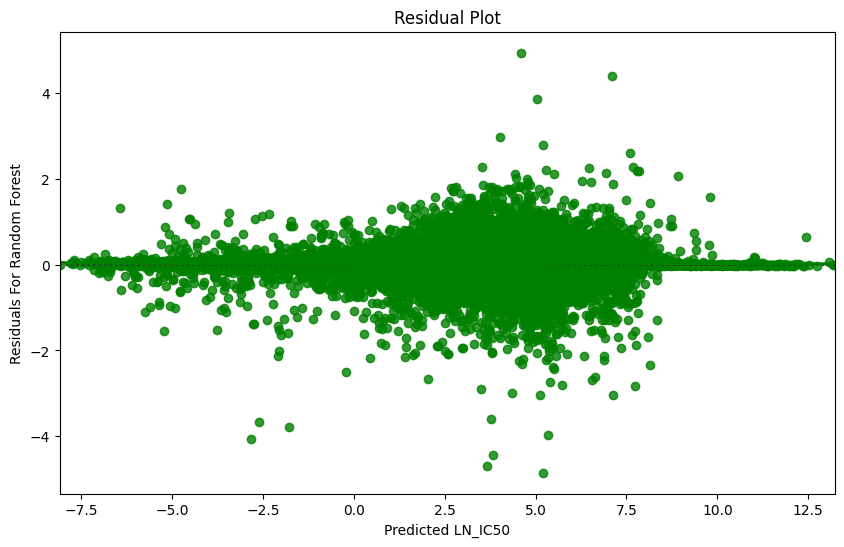

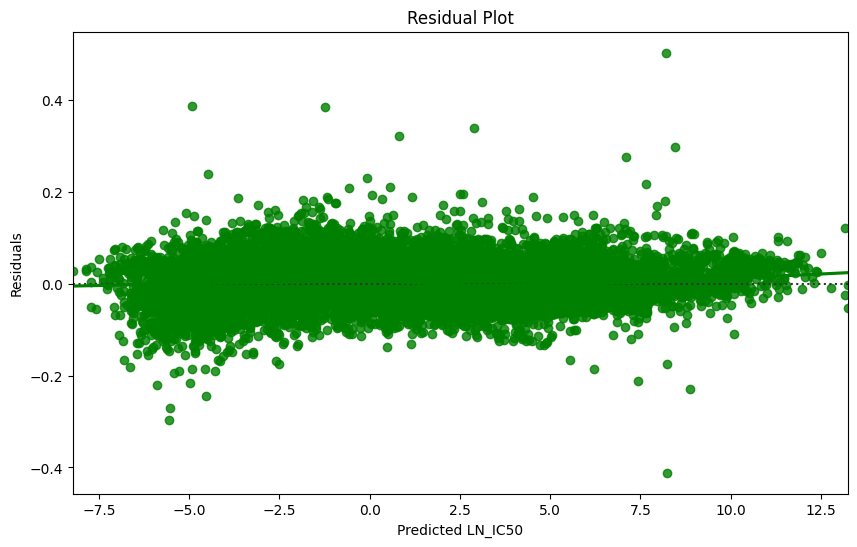

In [11]:
# Calculate residuals
residuals = y_test - y_pred_RandomForest

# Plot Residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_RandomForest, y=residuals, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicted LN_IC50')
plt.ylabel('Residuals For Random Forest')
plt.show()


# Calculate residuals
residuals = y_test_tensor - predictions

# Convert tensors to numpy for plotting
residuals = residuals.numpy()
predictions = predictions.numpy()

# Plot Residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=predictions, y=residuals, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicted LN_IC50')
plt.ylabel('Residuals')
plt.show()
